# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\altma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()

news_api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Preview the first Ethereum article to see how items are labeled
eth_articles["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Emma Roth',
 'title': 'US blames North Korean hacker group for $625 million Axie Infinity theft',
 'description': 'The US Department of Treasury has attributed the $625 Axie Infinity theft to Lazarus, a North Korean hacking group with ties to the country’s intelligence agency.',
 'url': 'https://www.theverge.com/2022/4/14/23025739/north-korean-hacker-lazarus-axie-infinity-cryptocurrency-hack-theft-us-blames',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/n8TGCqcud7UHPIbtgxLi10Owa5I=/0x52:1018x585/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23374959/Screen_Shot_2022_03_30_at_10.10.00_AM.png',
 'publishedAt': '2022-04-14T21:43:57Z',
 'content': 'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

len(btc_df)

20

In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.024585,0.070000,0.060600,0.869400
std,0.407708,0.067763,0.061405,0.093083
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.000000,0.844250
50%,0.012800,0.064000,0.063000,0.894000
75%,0.355075,0.085750,0.077000,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.092130,0.048850,0.067250,0.883900
std,0.479428,0.065337,0.073266,0.076861
min,-0.784500,0.000000,0.000000,0.681000
25%,-0.381800,0.000000,0.000000,0.827250
50%,-0.273200,0.000000,0.063000,0.921000
75%,0.303775,0.080500,0.077750,0.937000
max,0.735100,0.188000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin articles had the highest mean positive score.

Q: Which coin had the highest compound score?

A: An Ethereum article had the highest compound score with a score of 0.9327.

Q. Which coin had the highest positive score?

A: It was also an Ethereum article that had the highest positive score with a score of 0.349.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
import re

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\altma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\altma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin

btc_text = [str(article['content']) for article in btc_articles['articles']]
btc_tokens = [tokenizer(text) for text in btc_text]
btc_df['tokens'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [16]:
# Create a new tokens column for Ethereum

eth_text = [str(article['content']) for article in eth_articles['articles']]
eth_tokens = [tokenizer(text) for text in eth_text]
eth_df['tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[us, department, treasury, say, lazarus, behin..."
1,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, ha, revealed, nfts, work, instagram, us..."
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, crypto, browser, ..."
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_token_list = [item for sublist in btc_tokens for item in sublist]

btc_bigram_counts = Counter(ngrams(btc_token_list, n=2))

print(dict(btc_bigram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 2, ('char', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', '

In [19]:
# Generate the Ethereum N-grams where N=2
eth_token_list = [item for sublist in eth_tokens for item in sublist]

eth_bigram_counts = Counter(ngrams(eth_token_list, n=2))

print(dict(eth_bigram_counts))

{('us', 'department'): 1, ('department', 'treasury'): 1, ('treasury', 'say'): 1, ('say', 'lazarus'): 1, ('lazarus', 'behind'): 1, ('behind', 'attackthe'): 1, ('attackthe', 'us'): 1, ('us', 'treasury'): 1, ('treasury', 'department'): 1, ('department', 'blame'): 1, ('blame', 'north'): 1, ('north', 'korean'): 1, ('korean', 'hacking'): 1, ('hacking', 'group'): 1, ('group', 'lazarus'): 1, ('lazarus', 'stealing'): 1, ('stealing', 'million'): 1, ('million', 'cryptocurrency'): 1, ('cryptocurrency', 'ronin'): 1, ('ronin', 'networ'): 1, ('networ', 'char'): 1, ('char', 'meta'): 1, ('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digit

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(token_count(btc_token_list)))

{'char': 19, 'cryptocurrency': 12, 'bitcoin': 11, 'ha': 6, 'world': 6, 'week': 5, 'reuters': 5, 'online': 4, 'investor': 4, 'dropped': 4}


In [22]:
# Use token_count to get the top 10 words for Ethereum
print(dict(token_count(eth_token_list)))

{'char': 20, 'cryptocurrency': 7, 'bitcoin': 7, 'ha': 6, 'ethereum': 6, 'biggest': 5, 'reuters': 5, 'world': 5, 'may': 5, 'april': 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

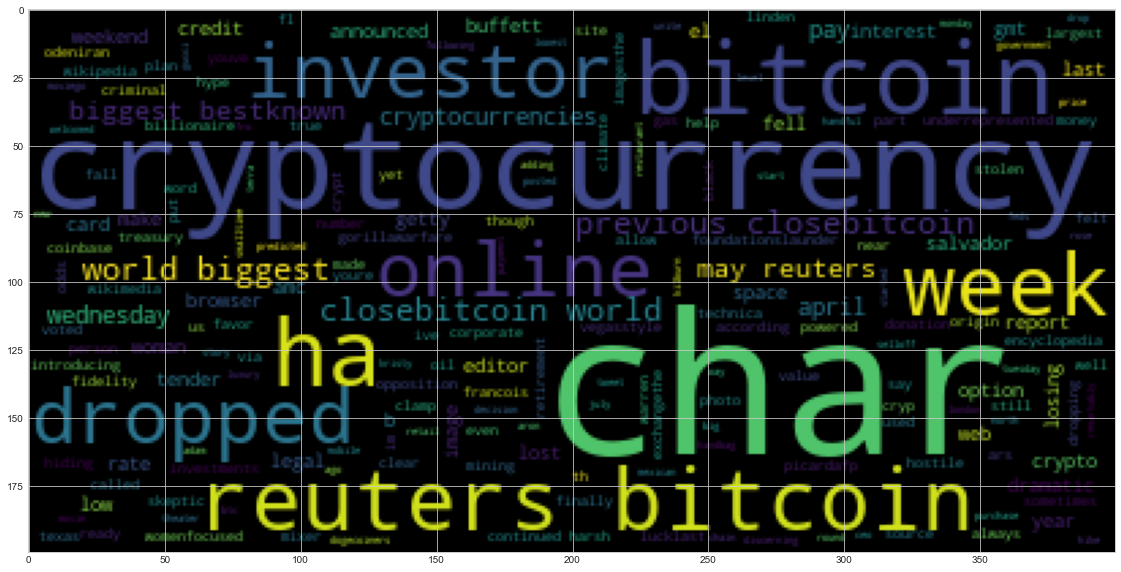

In [38]:
# Generate the Bitcoin word cloud
btc_words = ' '.join(btc_token_list)
btc_wc = WordCloud().generate(btc_words)
plt.imshow(btc_wc)

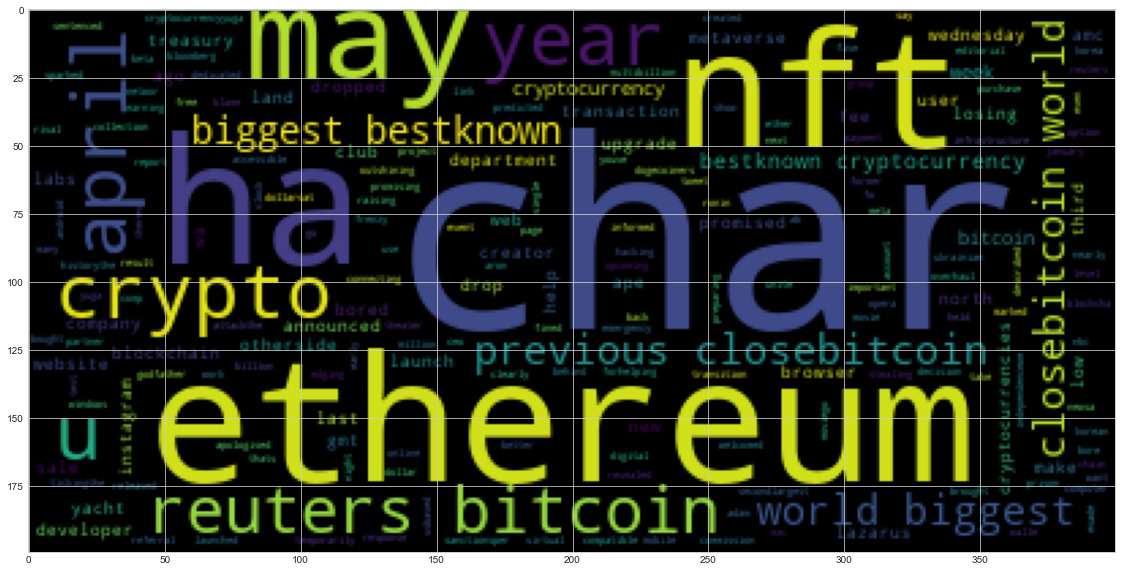

In [39]:
# Generate the Ethereum word cloud
eth_words = ' '.join(eth_token_list)
eth_wc = WordCloud().generate(eth_words)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [41]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
btc_corpus = ' '.join(btc_text)

In [51]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_corpus)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [52]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [48]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['Odeniran',
 'Linden',
 'Texas',
 'April 4th',
 '2022',
 'FRANCOIS PICARD/AFP',
 'Getty Images',
 'Wikipedia',
 "the Wikimedia Foundation's",
 'Ars Technica',
 'GorillaWarfare',
 'Warren Buffett',
 'the weekend',
 'Buffett',
 'Getty Images',
 'the weekend',
 '34,000',
 '27,630',
 'Coinbase',
 'Last week',
 'Fidelity Investments',
 'the US Treasury',
 'April 26',
 'Reuters',
 '5.1%',
 '38,391.36',
 'Tuesday',
 '2,229.82',
 'Bitcoin',
 '16%',
 'year',
 '+339',
 'May 4',
 'Reuters',
 '5.7%',
 '39,862.84',
 'Wednesday',
 '2,102.94',
 'Bitcoin',
 '20.9%',
 'year',
 'Bitcoin',
 'Gucci',
 'week',
 'Kristy Kilburn',
 'May 11',
 'Reuters',
 '7.23%',
 '28,758.29',
 '22:05 GMT',
 'Wednesday',
 '2,241.68',
 'Bitcoin',
 '40.4%',
 '+361',
 'last July',
 '33,000',
 'the week',
 'last week',
 'Fed',
 'May 9',
 'Reuters',
 '7.81%',
 '31,333.41',
 'Monday',
 '2,655.98',
 'Bitcoin',
 '35%',
 'AMC',
 'April 15',
 'AMC',
 'Adam Aron',
 'moviego',
 'Mexican',
 'North London',
 'a few weeks ago',
 'Opera',


---

### Ethereum NER

In [49]:
# Concatenate all of the Ethereum text together
eth_corpus = ' '.join(eth_text)

In [53]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_corpus)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [54]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [55]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['The US Department of Treasury',
 'Lazarus',
 'The US Treasury Department',
 'North Korean',
 'Lazarus',
 '$625 million',
 'Ronin',
 'Meta',
 'Instagram',
 'US',
 'Instagram',
 'Crypto Browser',
 'January',
 'Windows, Mac',
 'Android',
 'Ethereum',
 'Yuga Labs',
 'Bored Ape Yacht Club',
 'Yuga Labs',
 'Otherside',
 'April 30',
 'NFT',
 'Ethereum',
 'more than five years',
 '100,000',
 'North Korea',
 'US',
 'NBC News',
 'April 26',
 'Reuters',
 'No.2',
 'second',
 'AMC',
 'April 15',
 'AMC',
 'Adam Aron',
 'moviego',
 'the "Bored Apes Yacht Club',
 'Last night',
 'Bloomberg',
 'nearly a third',
 'a billion dollars',
 'Early this week',
 'the Ukrainian Computer Emergency Response Team',
 'Slovakian',
 'Russia',
 'GRU Sandworm',
 '40 days ago',
 '47,454',
 '34,007',
 '28%.About a third',
 'this week',
 'Ethereum',
 'Merge',
 'a few months after June',
 'first',
 'a year and a half ago',
 'The Order Flow',
 'Dan Robinson',
 "Georgios Konstantopoulos'",
 'Ethereum',
 'Dark Forest',
 'Augu